In [15]:
pip install opencv-python

                                              0.0/38.8 MB ? eta -:--:--
                                              0.0/38.8 MB ? eta -:--:--
                                              0.0/38.8 MB ? eta -:--:--
                                              0.0/38.8 MB ? eta -:--:--
                                              0.0/38.8 MB ? eta -:--:--
                                             0.0/38.8 MB 130.4 kB/s eta 0:04:58
                                             0.1/38.8 MB 286.7 kB/s eta 0:02:16
                                             0.1/38.8 MB 286.7 kB/s eta 0:02:16
                                             0.1/38.8 MB 286.7 kB/s eta 0:02:16
                                             0.1/38.8 MB 286.7 kB/s eta 0:02:16
                                             0.1/38.8 MB 327.1 kB/s eta 0:01:59
                                             0.1/38.8 MB 327.1 kB/s eta 0:01:59
                                             0.1/38.8 MB 327.1 kB/s eta 0:01:59


# Importing Libraries

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import cv2

# Task 1

In [ ]:
def calculate_threshold(image_path):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Calculate the average pixel value
    threshold = np.mean(image_array)
    return threshold

# Task 2

In [41]:
def convert_to_grayscale(image_path):
    # Open the image
    image = Image.open(image_path)
    # Convert the image to grayscale
    grayscale_image = image.convert('L')    
    return grayscale_image

# Task 3

In [42]:
def simple_halftoning(image_path, threshold=128):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Apply the threshold
    halftoned_array = np.where(image_array < threshold, 0, 255)
    
    # Convert the halftoned array back to an image
    halftoned_image = Image.fromarray(halftoned_array.astype(np.uint8))
    
    return halftoned_image

In [43]:
def advanced_halftoning(image_path, threshold=128):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Get the dimensions of the image
    rows, cols = image_array.shape
    # Create an output array to store the halftoned image
    halftoned_array = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            old_pixel = image_array[i, j]
            new_pixel = 0 if old_pixel < threshold else 255
            halftoned_array[i, j] = new_pixel
            error = old_pixel - new_pixel
            # Propagate the error to neighboring pixels
            if j + 1 < cols:
                image_array[i, j + 1] += error * 7 / 16
            if i + 1 < rows and j > 0:
                image_array[i + 1, j - 1] += error * 3 / 16
            if i + 1 < rows:
                image_array[i + 1, j] += error * 5 / 16
            if i + 1 < rows and j + 1 < cols:
                image_array[i + 1, j + 1] += error * 1 / 16
    # Convert the halftoned array back to an image
    halftoned_image = Image.fromarray(halftoned_array)    
    return halftoned_image


# Task 4

In [44]:
def custom_histogram_equalization(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate the histogram
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1
    
    # Calculate the cumulative histogram
    cum_hist = np.cumsum(hist)
    
    # Normalize the cumulative histogram
    cum_hist_normalized = (cum_hist - cum_hist.min()) * 255 / (cum_hist.max() - cum_hist.min())
    cum_hist_normalized = cum_hist_normalized.astype('uint8')
    
    # Map the old pixel values to new values
    equalized_image = cum_hist_normalized[image]
    
    # Plot the original and equalized histograms
    plt.figure()
    plt.title("Original Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()
    
    equalized_hist = np.zeros(256, dtype=int)
    for pixel in equalized_image.flatten():
        equalized_hist[pixel] += 1
    
    plt.figure()
    plt.title("Equalized Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(equalized_hist)
    plt.xlim([0, 256])
    plt.show()
    
    return equalized_image

In [45]:
def custom_histogram_equalization(image_path):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Calculate the histogram
    hist = np.zeros(256, dtype=int)
    for pixel in image_array.flatten():
        hist[pixel] += 1
    
    # Calculate the cumulative histogram
    cum_hist = np.cumsum(hist)
    
    # Normalize the cumulative histogram
    cum_hist_normalized = (cum_hist - cum_hist.min()) * 255 / (cum_hist.max() - cum_hist.min())
    cum_hist_normalized = cum_hist_normalized.astype('uint8')
    
    # Map the old pixel values to new values
    equalized_array = cum_hist_normalized[image_array]
    
    # Convert the equalized array back to an image
    equalized_image = Image.fromarray(equalized_array)
    
    return equalized_image

In [ ]:
def get_histogram(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Plot the histogram
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()
    
    return hist


In [ ]:
import matplotlib.pyplot as plt

image_path = "th.jpg"
hist = get_histogram(image_path)
analysis_result = analyze_histogram(hist)
print(analysis_result)

In [ ]:
def analyze_histogram(hist):
    # Analyze the histogram to determine if it is good or not
    # A good histogram should have a wide range of pixel values and should not be too skewed to one side
    total_pixels = sum(hist)
    low_pixel_count = sum(hist[:50])
    high_pixel_count = sum(hist[206:])
    
    if low_pixel_count / total_pixels > 0.5:
        return "The histogram is not good because it is too skewed to the dark side."
    elif high_pixel_count / total_pixels > 0.5:
        return "The histogram is not good because it is too skewed to the bright side."
    else:
        return "The histogram is good because it has a wide range of pixel values."


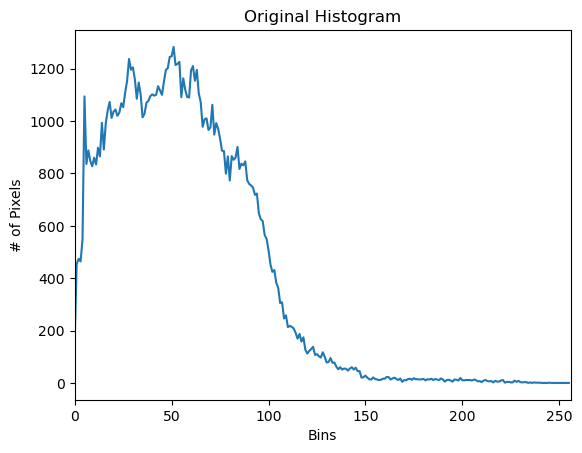

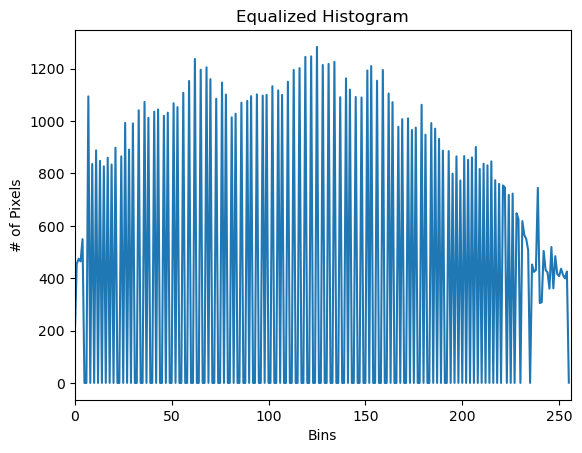

True

In [20]:
image_path = 'th.jpg'
equalized_image = custom_histogram_equalization(image_path)
cv2.imwrite('equalized_image.jpg', equalized_image)

In [46]:
def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        original_image = Image.open(file_path)
        grayscale_image = convert_to_grayscale(file_path)
        threshold = calculate_threshold(file_path)
        halftoned_image = simple_halftoning(file_path, threshold)
        advanced_halftoning_image = advanced_halftoning(file_path)
        equalized_image = custom_histogram_equalization(file_path)
        display_images(original_image, grayscale_image, halftoned_image, threshold , advanced_halftoning_image ,equalized_image)

In [47]:
def display_images(original_image, grayscale_image, halftoned_image, threshold ,advanced_halftoning_image ,equalized_image):
    original_image_tk = ImageTk.PhotoImage(original_image)
    grayscale_image_tk = ImageTk.PhotoImage(grayscale_image)
    halftoned_image_tk = ImageTk.PhotoImage(halftoned_image)
    advanced_halftoning_image_tk = ImageTk.PhotoImage(advanced_halftoning_image)
    equalized_image_tk = ImageTk.PhotoImage(equalized_image)
    
    original_label.config(image=original_image_tk)
    original_label.image = original_image_tk
    grayscale_label.config(image=grayscale_image_tk)
    grayscale_label.image = grayscale_image_tk
    halftoned_label.config(image=halftoned_image_tk)
    halftoned_label.image = halftoned_image_tk
    threshold_label.config(text=f"Threshold: {threshold:.2f}")
    advancedHalfton_label.config(image = advanced_halftoning_image_tk)
    advancedHalfton_label.image = advanced_halftoning_image_tk
    equalized_label.config(image=equalized_image_tk)
    equalized_label.image = equalized_image_tk

In [48]:
def display_images(original_image, grayscale_image, halftoned_image, threshold ,advanced_halftoning_image ,equalized_image):
    original_image_tk = ImageTk.PhotoImage(original_image)
    grayscale_image_tk = ImageTk.PhotoImage(grayscale_image)
    halftoned_image_tk = ImageTk.PhotoImage(halftoned_image)
    advanced_halftoning_image_tk = ImageTk.PhotoImage(advanced_halftoning_image)
    equalized_image_tk = ImageTk.PhotoImage(equalized_image)
    
    original_label.config(image=original_image_tk)
    original_label.image = original_image_tk
    grayscale_label.config(image=grayscale_image_tk)
    grayscale_label.image = grayscale_image_tk
    halftoned_label.config(image=halftoned_image_tk)
    halftoned_label.image = halftoned_image_tk
    threshold_label.config(text=f"Threshold: {threshold:.2f}")
    advancedHalfton_label.config(image = advanced_halftoning_image_tk)
    advancedHalfton_label.image = advanced_halftoning_image_tk
    equalized_label.config(image=equalized_image_tk)
    equalized_label.image = equalized_image_tk


In [ ]:
# Create the main window
root = tk.Tk()
root.title("Image Thresholding")

# Create and place the widgets in a grid layout for better control over positioning
open_button = tk.Button(root, text="Open Image", command=open_image)
open_button.grid(row=0, column=0, columnspan=2, pady=10)

original_label = tk.Label(root)
original_label.grid(row=1, column=0, pady=10)

grayscale_label = tk.Label(root)
grayscale_label.grid(row=1, column=1, pady=10)

halftoned_label = tk.Label(root)
halftoned_label.grid(row=2, column=0, pady=10)

threshold_label = tk.Label(root, text="Threshold: N/A")
threshold_label.grid(row=2, column=1, pady=10)

advancedHalfton_label = tk.Label(root)
advancedHalfton_label.grid(row=2, column=2, pady=10)

equalized_label = tk.Label(root)
equalized_label.grid(row=1, column=2, pady=10)


# Start the GUI event loop
root.mainloop()